In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing Libraries, reading and understanding the data

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv('/Users/aditya/data-mining/adult_data.csv')
df_test = pd.read_csv('/Users/aditya/data-mining/adult_test.csv')
data_descr = pd.read_csv('/Users/aditya/data-mining/adult_descr.csv', sep=':')

data_names = data_descr.tail(15)
names = list(data_names.index)

# move the first column on the last position
names.append(names[0])
names = names[1:]

df = pd.read_csv('/Users/aditya/data-mining/adult_data.csv', names=names)
df = df.rename(columns={',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,': 'income'})
df.head(15)

df_test = pd.read_csv('/Users/aditya/data-mining/adult_test.csv', names=names)
df_test = df_test.rename(columns={',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,': 'income'})
df_test = df_test.iloc[1:]
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


<Axes: xlabel='income', ylabel='count'>

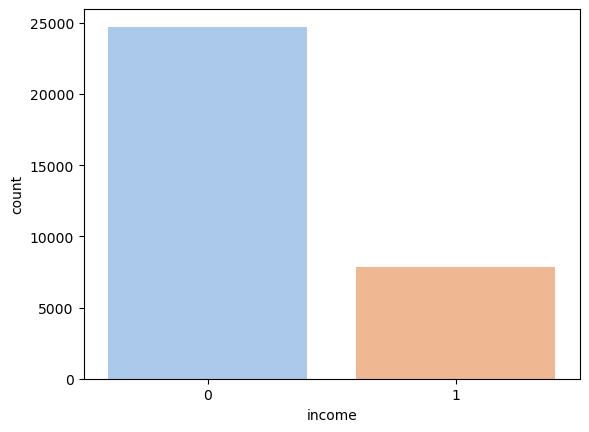

In [65]:
sns.countplot(x='income', data=df, palette='pastel')

Pointing out missing data

In [151]:
import pandas as pd

# Assuming df is your DataFrame
total_rows = len(df)

# Check frequency of '?' in each column
missing_freq = (df == ' ?').sum()

# Calculate percentage of missing data
missing_percentage = (missing_freq / total_rows) * 100

# Display results for columns with missing data
for column in missing_freq.index:
    if missing_freq[column] > 0:
        print(f"{column}:")
        print(f"  Number of '?': {missing_freq[column]}")
        print(f"  Percentage: {missing_percentage[column]:.2f}%")
        print(f"  Mode (replacement value): {df[column].mode()[0]}")
        print()

# Calculate total percentage of rows with any missing data
rows_with_missing = df.isin([' ?']).any(axis=1).sum()
total_missing_percentage = (rows_with_missing / total_rows) * 100

print(f"Total rows with any missing data: {rows_with_missing}")
print(f"Percentage of dataset affected: {total_missing_percentage:.2f}%")

workclass:
  Number of '?': 1836
  Percentage: 5.64%
  Mode (replacement value):  Private

occupation:
  Number of '?': 1843
  Percentage: 5.66%
  Mode (replacement value):  Prof-specialty

native-country:
  Number of '?': 583
  Percentage: 1.79%
  Mode (replacement value):  United-States

Total rows with any missing data: 2399
Percentage of dataset affected: 7.37%


Replacing missing data with mode

In [152]:
df['workclass'] = df['workclass'].replace(' ?', 'Private')
df['occupation'] = df['occupation'].replace(' ?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace(' ?', 'United-States')
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [56]:

df_test['workclass'] = df_test['workclass'].replace(' ?', 'Private')
df_test['occupation'] = df_test['occupation'].replace(' ?', 'Prof-specialty')
df_test['native-country'] = df_test['native-country'].replace(' ?', 'United-States')
df_test.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29,Private,227026.0,HS-grad,9.0,Never-married,Prof-specialty,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
8,63,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
9,24,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.
10,55,Private,104996.0,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K.


In [66]:
# education Category
df.education= df.education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'School')
df.education = df.education.replace(' HS-grad', 'HighSchool-Grad')
df.education = df.education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'Higher')
df.education = df.education.replace('Bachelors', 'Undergrad')
df.education = df.education.replace('Masters', 'Grad')
df.education = df.education.replace('Doctorate', 'Doc')

#martial status
df['marital-status']= df['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Married')
df['marital-status']= df['marital-status'].replace([' Never-married'], 'Not-married')
df['marital-status']= df['marital-status'].replace([' Divorced', ' Separated',' Widowed',
                                                   ' Married-spouse-absent'], ' Other')

# income
df.income = df.income.replace(' <=50K', 0)
df.income = df.income.replace(' >50K', 1)
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Not-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HighSchool-Grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,School,5,Other,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HighSchool-Grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Not-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [58]:
df_test['fnlwgt'] = df_test['fnlwgt'].astype(int)
df_test['education-num'] = df_test['education-num'].astype(int)
df_test['capital-gain'] = df_test['capital-gain'].astype(int)
df_test['capital-loss'] = df_test['capital-loss'].astype(int)
df_test['hours-per-week'] = df_test['hours-per-week'].astype(int)

# education Category
df_test.education= df_test.education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'School')
df_test.education = df_test.education.replace(' HS-grad', 'HighSchool-Grad')
df_test.education = df_test.education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'Higher')
df_test.education = df_test.education.replace('Bachelors', 'Undergrad')
df_test.education = df_test.education.replace('Masters', 'Grad')
df_test.education = df_test.education.replace('Doctorate', 'Doc')

#martial status
df_test['marital-status']= df_test['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Married')
df_test['marital-status']= df_test['marital-status'].replace([' Never-married'], 'Not-married')
df_test['marital-status']= df_test['marital-status'].replace([' Divorced', ' Separated',' Widowed',' Married-spouse-absent'], ' Other')

# income
df_test.income = df_test.income.replace(' <=50K.', 0)
df_test.income = df_test.income.replace(' >50K.', 1)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,School,7,Not-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
2,38,Private,89814,HighSchool-Grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
3,28,Local-gov,336951,Higher,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
4,44,Private,160323,Higher,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,18,Private,103497,Higher,10,Not-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


Data transformation and Model building

In [79]:
X= df.drop(['income'], axis=1)
y = df['income']

from sklearn.preprocessing import StandardScaler, LabelEncoder
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,0,12,2,1,1,4,1,25,0,39,39,0
1,33,6,2926,0,12,1,4,0,4,1,0,0,12,39,0
2,21,4,14086,3,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,5,6,1,6,0,2,1,0,0,39,39,0
4,11,4,19355,0,12,1,10,5,2,0,0,0,39,5,0


In [99]:
A= df_test.drop(['income'], axis=1)
b= df_test['income']

from sklearn.preprocessing import StandardScaler, LabelEncoder
df2= df_test.copy()
df2= df2.apply(LabelEncoder().fit_transform)
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,8,3,8931,5,6,2,6,3,2,1,0,0,39,37,0
2,21,3,1888,3,8,1,4,0,4,1,0,0,49,37,0
3,11,1,11540,4,11,1,10,0,4,1,0,0,39,37,1
4,27,3,5146,4,9,1,6,0,2,1,90,0,39,37,1
5,1,8,2450,4,9,2,14,3,4,0,0,0,29,37,0


In [100]:
ss= StandardScaler().fit(df1.drop('income', axis=1))
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,0,12,2,1,1,4,1,25,0,39,39,0
1,33,6,2926,0,12,1,4,0,4,1,0,0,12,39,0
2,21,4,14086,3,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,5,6,1,6,0,2,1,0,0,39,39,0
4,11,4,19355,0,12,1,10,5,2,0,0,0,39,5,0


In [101]:
ssa= StandardScaler().fit(df2.drop('income', axis=1))
A= ssa.transform(df2.drop('income', axis=1))
b= df_test['income']

df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,8,3,8931,5,6,2,6,3,2,1,0,0,39,37,0
2,21,3,1888,3,8,1,4,0,4,1,0,0,49,37,0
3,11,1,11540,4,11,1,10,0,4,1,0,0,39,37,1
4,27,3,5146,4,9,1,6,0,2,1,90,0,39,37,1
5,1,8,2450,4,9,2,14,3,4,0,0,0,29,37,0


In [102]:
from sklearn.model_selection import train_test_split

X_train=X
y_train=y
A_test=A
b_test=b

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(A_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(A_test, b_test)))

Acc on training data: 0.825
Acc on test data: 0.824


In [103]:
for i in range(10):   
    model = lr.fit(X_train, y_train)

In [105]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(A_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(A_test, b_test)))

Acc on training data: 1.000
Acc on test data: 0.849


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  

# Fit the model
model2 = knn.fit(X_train, y_train)

# Make predictions
prediction2 = model2.predict(A_test)

# Print accuracies
print("KNN Acc on training data: {:,.3f}".format(knn.score(X_train, y_train)))
print("KNN Acc on test data: {:,.3f}".format(knn.score(A_test, b_test)))

KNN Acc on training data: 0.887
KNN Acc on test data: 0.832


Hyperparameter tuning

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your data splits

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Include your current best (5)
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # 1 for manhattan, 2 for euclidean
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model to make predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(A_test)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(b_test, y_pred)
print("Test accuracy with best parameters:", test_accuracy)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.8472098847098847
Test accuracy with best parameters: 0.8435599778883361


In [40]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import time

# Assuming X_train, y_train, A_test, and b_test are already defined

# Define a smaller parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a base model with max_features explicitly set to 'sqrt'
rf = RandomForestClassifier(random_state=42, max_features='sqrt')

# Instantiate the RandomizedSearchCV object with fewer iterations
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
start_time = time.time()
rf_random.fit(X_train, y_train)
train_time = time.time() - start_time

print("Best parameters found: ", rf_random.best_params_)
print(f"Training time: {train_time:.2f} seconds")

# Calculate and print training accuracy
y_train_pred = rf_random.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training data: {train_accuracy:.3f}")

# Make predictions on the test set
start_time = time.time()
y_pred = rf_random.predict(A_test)
predict_time = time.time() - start_time

print(f"Prediction time: {predict_time:.2f} seconds")

# Calculate and print test accuracy
test_accuracy = accuracy_score(b_test, y_pred)
print(f"Accuracy on test data: {test_accuracy:.3f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(b_test, y_pred))



Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; 

Learning Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

rf_random = RandomForestClassifier(n_estimators=100, random_state=42)
plot_learning_curve(random_rf, X, y, "Learning Curve - Random Forest")

plot_learning_curve(best_knn, X, y, "Learning Curve - KNN")


Cross validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification  # For generating a more realistic dataset

def evaluate_model(X, y, model, n_splits=5):
    # Initialize the StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Initialize lists to store the results
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Perform k-fold cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        # Split the data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Scale the features
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Train the model
        best_rf.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = best_rf.predict(X_val_scaled)
        
        # Calculate metrics
        accuracies.append(accuracy_score(y_val, y_pred))
        precisions.append(precision_score(y_val, y_pred, average='weighted'))
        recalls.append(recall_score(y_val, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_val, y_pred, average='weighted'))
        
        print(f"Fold {fold} - Accuracy: {accuracies[-1]:.4f}, Precision: {precisions[-1]:.4f}, "
              f"Recall: {recalls[-1]:.4f}, F1-score: {f1_scores[-1]:.4f}")
    
    # Calculate and print average metrics
    print("\nAverage metrics:")
    print(f"Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
    print(f"Precision: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
    print(f"Recall: {np.mean(recalls):.4f} (+/- {np.std(recalls):.4f})")
    print(f"F1-score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

# Example usage
if __name__ == "__main__":
    # Generate a more realistic dataset
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                               n_redundant=5, n_classes=2, random_state=42)
    
    # Initialize your model (replace with your actual model if needed)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Evaluate the model
    evaluate_model(X, y, model)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def evaluate_knn(X, y, n_neighbors=5, weights='uniform', cv=5):
    # Initialize the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

    # Define the scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }
    
    # Perform cross-validation
    results = cross_validate(knn, X, y, cv=cv, scoring=scoring)
    
    # Print results
    print(f"KNN (n_neighbors={n_neighbors}, weights={weights}):")
    for metric in scoring.keys():
        scores = results[f'test_{metric}']
        print(f"{metric.capitalize()}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print()

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    
    # Generate a sample dataset (replace with your actual data)
    X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.7, 0.3], 
                               n_features=20, random_state=42)
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Evaluate KNN with different parameters
    evaluate_knn(X_scaled, y, n_neighbors=3)
    evaluate_knn(X_scaled, y, n_neighbors=5)
    evaluate_knn(X_scaled, y, n_neighbors=11)
    evaluate_knn(X_scaled, y, n_neighbors=7, weights='distance')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the scores
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    # Train the model
    model1.fit(X_train_fold, y_train_fold)
    
    # Make predictions
    y_pred = model1.predict(X_val_fold)
    
    # Calculate scores
    accuracies.append(accuracy_score(y_val_fold, y_pred))
    precisions.append(precision_score(y_val_fold, y_pred, average='weighted'))
    recalls.append(recall_score(y_val_fold, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))

# Calculate mean scores
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-score: {mean_f1:.4f}")

**Model Evaluation**

Confusion matrix, Classification Report, Error-rate and execution time


KNN Model Evaluation:
Confusion Matrix:
[[11347  1088]
 [ 1459  2387]]


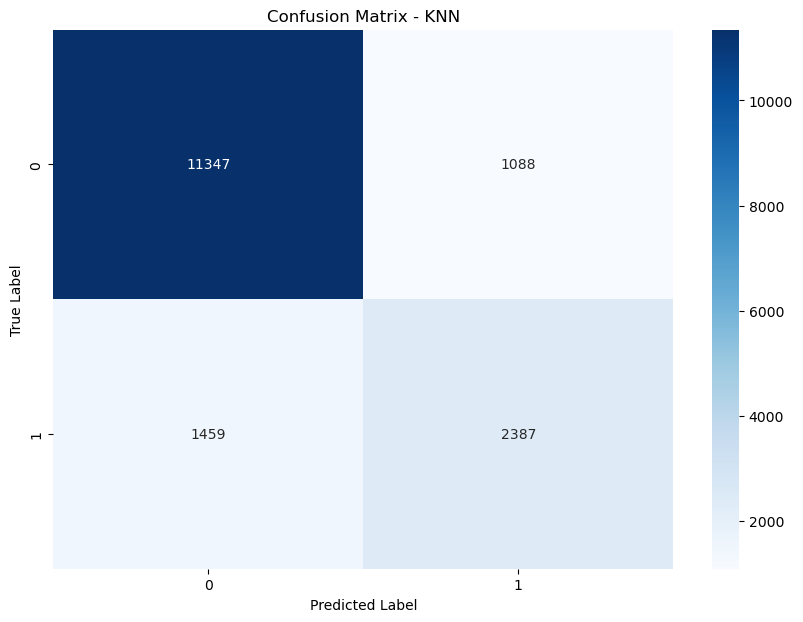

Error Rate: 0.1564
Execution Time: 5.4092 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     12435
           1       0.69      0.62      0.65      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.77      0.78     16281
weighted avg       0.84      0.84      0.84     16281


Random Forest Model Evaluation:
Confusion Matrix:
[[11669   766]
 [ 1595  2251]]


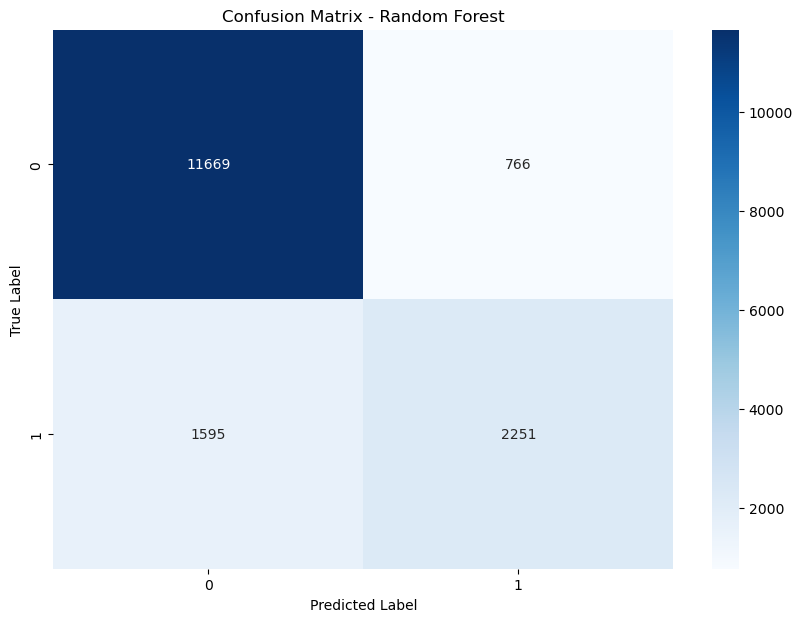

Error Rate: 0.1450
Execution Time: 0.1839 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.75      0.59      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [44]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming best_knn and best_rf are your tuned models
best_rf = rf_random
models = {
    'KNN': best_knn,
    'Random Forest': best_rf
}

for name, model in models.items():
    print(f"\n{name} Model Evaluation:")
    
    # Start timing
    start_time = time.time()
    
    # Make predictions
    y_pred = model.predict(A_test)
    
    # End timing
    end_time = time.time()
    
    # Confusion Matrix
    cm = confusion_matrix(b_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Error Rate
    error_rate = 1 - accuracy_score(b_test, y_pred)
    print(f"Error Rate: {error_rate:.4f}")
    
    # Execution Time
    execution_time = end_time - start_time
    print(f"Execution Time: {execution_time:.4f} seconds")
    
    # Classification Report
    cr = classification_report(b_test, y_pred)
    print("Classification Report:")
    print(cr)

Balanced Accuracy

In [122]:
import numpy as np

def balanced_accuracy(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return (sensitivity + specificity) / 2

# KNN confusion matrix
cm_knn = np.array([[11414, 1021],
                   [1474, 2372]])

# Random Forest confusion matrix
cm_rf = np.array([[11679, 756],
                  [1507, 2339]])

ba_knn = balanced_accuracy(cm_knn)
ba_rf = balanced_accuracy(cm_rf)

print(f"Balanced Accuracy for KNN: {ba_knn:.4f}")
print(f"Balanced Accuracy for Random Forest: {ba_rf:.4f}")

Balanced Accuracy for KNN: 0.7673
Balanced Accuracy for Random Forest: 0.7737


ROC curve

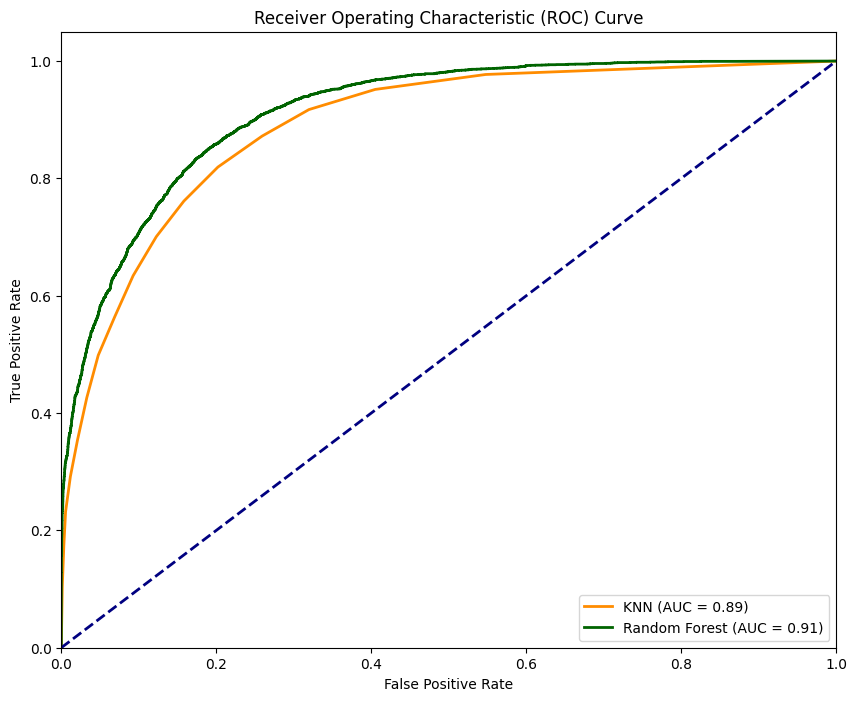

AUC for KNN: 0.8900
AUC for Random Forest: 0.9143


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming best_knn and best_rf are your tuned models
# and A_test and b_test are your test data
best_rf = rf_random
# KNN predictions
y_pred_proba_knn = best_knn.predict_proba(A_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(b_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Random Forest predictions
y_pred_proba_rf = best_rf.predict_proba(A_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(b_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2,
         label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2,
         label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for KNN: {roc_auc_knn:.4f}")
print(f"AUC for Random Forest: {roc_auc_rf:.4f}")


Confidence Interval

In [46]:
import numpy as np
from sklearn.metrics import accuracy_score
from scipy import stats
from joblib import Parallel, delayed

def bootstrap_confidence_interval(model, X, y, n_iterations=200, ci=0.95, n_jobs=-1, sample_size=10000):
    n_samples = min(len(y), sample_size)
    
    def single_bootstrap(seed):
        np.random.seed(seed)
        indices = np.random.randint(0, len(y), n_samples)
        X_bootstrap = X[indices] if isinstance(X, np.ndarray) else X.iloc[indices].values
        y_bootstrap = y[indices] if isinstance(y, np.ndarray) else y.iloc[indices].values
        y_pred = model.predict(X_bootstrap)
        return accuracy_score(y_bootstrap, y_pred)
    
    accuracies = Parallel(n_jobs=n_jobs)(delayed(single_bootstrap)(i) for i in range(n_iterations))
    
    lower_bound, upper_bound = np.percentile(accuracies, [(1-ci)/2 * 100, (1+ci)/2 * 100])
    return np.mean(accuracies), lower_bound, upper_bound

# Assuming best_knn and best_rf are your tuned models
# and A_test, b_test are your test data

# For KNN
knn_mean, knn_lower, knn_upper = bootstrap_confidence_interval(best_knn, A_test, b_test)
print(f"KNN Accuracy: {knn_mean:.4f} (95% CI: {knn_lower:.4f} - {knn_upper:.4f})")

# For Random Forest
rf_mean, rf_lower, rf_upper = bootstrap_confidence_interval(best_rf, A_test, b_test)
print(f"Random Forest Accuracy: {rf_mean:.4f} (95% CI: {rf_lower:.4f} - {rf_upper:.4f})")


KNN Accuracy: 0.8436 (95% CI: 0.8362 - 0.8497)
Random Forest Accuracy: 0.8550 (95% CI: 0.8485 - 0.8619)


Final Execution Time 

In [91]:
import time
import numpy as np

# Assuming A_test is your test feature set

# Function to measure execution time
def measure_execution_time(model, X_test, n_runs=10):
    times = []
    for _ in range(n_runs):
        start_time = time.time()
        model.predict(X_test)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

# Measure execution time for Random Forest
rf_mean_time, rf_std_time = measure_execution_time(best_rf, A_test)

# Measure execution time for KNN
knn_mean_time, knn_std_time = measure_execution_time(best_knn, A_test)

# Print results
print(f"Random Forest Execution Time: {rf_mean_time:.4f} ± {rf_std_time:.4f} seconds")
print(f"KNN Execution Time: {knn_mean_time:.4f} ± {knn_std_time:.4f} seconds")


Random Forest Execution Time: 0.1364 ± 0.0057 seconds
KNN Execution Time: 5.2325 ± 0.0764 seconds
